#Exercise Purpose:
Understand the general pipeline of building NNs and training them
Practice building NN models using a dataset.

##Dataset Information:
We have an insurance dataset where each row represents a person, and the columns contain information used by an insurance company to determine charges: age, sex, BMI, number of children, smoking status, region, and charges. Our goal is to build a predictive model for the amount of charges.



Step 1: Explore the dataset and understand the data

In [1]:
import pandas as pd


datapath = '/Users/mackmorgan/Downloads/Class17-py/insurance.csv'
data = pd.read_csv(datapath)

print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Step 2: See what happens after applying "pd.get_dummies" to the dataset.

In [2]:
from sklearn.preprocessing import StandardScaler
# Preprocessing
# Convert categorical variables to numerical
df = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True,dtype='int')

print(df)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400         0           1   
1      18  33.770         1   1725.55230         1           0   
2      28  33.000         3   4449.46200         1           0   
3      33  22.705         0  21984.47061         1           0   
4      32  28.880         0   3866.85520         1           0   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830         1           0   
1334   18  31.920         0   2205.98080         0           0   
1335   18  36.850         0   1629.83350         0           0   
1336   21  25.800         0   2007.94500         0           0   
1337   61  29.070         0  29141.36030         0           1   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0  

Step 3. Split the data into training and validation sets

In [3]:
# Split features and target variable
X = df.drop('charges', axis=1).values
y = df['charges'].values

from sklearn.model_selection import train_test_split
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

[[46.    19.95   2.    ...  1.     0.     0.   ]
 [47.    24.32   0.    ...  0.     0.     0.   ]
 [52.    24.86   0.    ...  0.     1.     0.   ]
 ...
 [58.    25.175  0.    ...  0.     0.     0.   ]
 [37.    47.6    2.    ...  0.     0.     1.   ]
 [55.    29.9    0.    ...  0.     0.     1.   ]]


Step 4. Convert them into PyTorch tensors so we can use them for Pytorch models.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Convert them into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
print(X_train_tensor.size())
print(y_train_tensor.size())

torch.Size([1070, 8])
torch.Size([1070, 1])


torch.Size([1070, 8]): tells us that 1070 rows (people) with 8 columns (features)

Step 5. building Model 1: one hidden layer NN

In [5]:
# Define the neural network model
class OneLayerNN(nn.Module):
    def __init__(self):
        super(OneLayerNN, self).__init__()
        #hidden layer 1
        self.h1 = nn.Linear(X_train.shape[1], 64)
        #output layer
        self.o = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.h1(x))
        x = self.o(x)
        return x


## Training the Model 1

###*Note that we will use the Adam optimizer to adjust our parameters for today's exercise. For now, let's consider Adam as an advanced version of Gradient Descent. We'll review these different techniques in our next class.

Step 6. Training setup

In [6]:
# Create model, define loss function and optimizer
model_1 = OneLayerNN()
criterion = nn.MSELoss()
#Adam instead of GD
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.01)


Step 7. Training

In [7]:
# Training the model
losses_1 = []
num_epochs = 10000

for epoch in range(num_epochs):
    model_1.train()

    optimizer_1.zero_grad()

    outputs = model_1(X_train_tensor)

    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer_1.step()

    losses_1.append(loss.item())
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 121360632.0000
Epoch [2000/10000], Loss: 94838952.0000
Epoch [3000/10000], Loss: 49684872.0000
Epoch [4000/10000], Loss: 35436952.0000
Epoch [5000/10000], Loss: 31462436.0000
Epoch [6000/10000], Loss: 28678608.0000
Epoch [7000/10000], Loss: 26477202.0000
Epoch [8000/10000], Loss: 24851128.0000
Epoch [9000/10000], Loss: 23800982.0000
Epoch [10000/10000], Loss: 23198392.0000


## Reusable function for plotting a loss history during training

In [8]:
import matplotlib.pyplot as plt

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

def plot_loss(lof_losses):
    plt.figure(figsize=(10, 5))
    for ix,i in enumerate(lof_losses):
        plt.plot(range(num_epochs), i, label=f'Model {ix+1}', color=colors[ix])
    plt.title('Loss over Epochs for Model(s)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

##Plot losses for Model 1

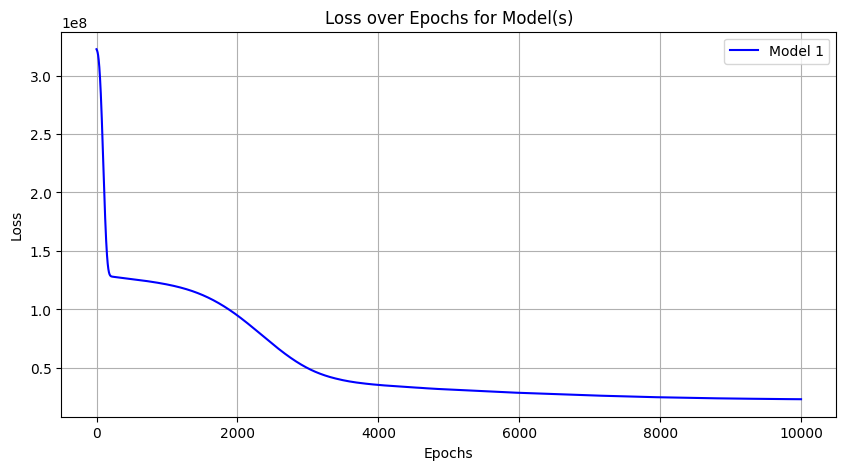

In [9]:
plot_loss([losses_1])

## Prediction using Model 1

In [10]:
# Evaluating the model
model_1.eval()
with torch.no_grad():
    test_outputs = model_1(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

print('the first 10 predictions result')
print('True,Prediction')
for i in range(10):
    print(y_test_tensor[i],test_outputs[i])


Test Loss: 20764438.0000
the first 10 predictions result
True,Prediction
tensor([9095.0684]) tensor([10254.9951])
tensor([5272.1758]) tensor([6449.9058])
tensor([29330.9824]) tensor([33455.6836])
tensor([9301.8936]) tensor([10463.6279])
tensor([33750.2930]) tensor([28338.0625])
tensor([4536.2588]) tensor([6089.2295])
tensor([2117.3389]) tensor([2726.6626])
tensor([14210.5361]) tensor([15432.1045])
tensor([3732.6250]) tensor([4807.1211])
tensor([10264.4424]) tensor([11598.2842])


# Let's build more models.

## Let's build an NN using two hidden layers (Model 2)

In [11]:
class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.h1 = nn.Linear(X_train.shape[1], 64)#hidden layer 1
        self.h2 = nn.Linear(64, 32)#hidden layer 2
        self.o = nn.Linear(32, 1)#output layer

    def forward(self, x):
        x = torch.relu(self.h1(x))
        x = torch.relu(self.h2(x))
        x = self.o(x)
        return x



## Build an NN network with three hidden layers (Model 3)

In [12]:
class ThreeLayerNN(nn.Module):
   def __init__(self):
        super(ThreeLayerNN, self).__init__()
        self.h1 = nn.Linear(X_train.shape[1], 64)#hidden layer 1
        self.h2 = nn.Linear(64, 32)#hidden layer 2
        self.h3 = nn.Linear(32,16)#hidden layer 3
        self.o = nn.Linear(16, 1)#output layer

   def forward(self, x):
        x = torch.relu(self.h1(x))
        x = torch.relu(self.h2(x))
        x = torch.relu(self.h3(x))
        x = self.o(x)
        return x

## Complete an NN model below (Model 4)

This model uses LeakyReLU (instead of ReLU)

*   ReLU(x) = max(0,x)
*   LeakyReLU(x) = {x if x > 0, cx if x <= 0} where c is a small constant, often set to 0.01.






In [13]:
class TwoLayerNN_LeakyReLU(nn.Module):
    def __init__(self):
        super(TwoLayerNN_LeakyReLU, self).__init__()
        self.h1 = nn.Linear(X_train.shape[1], 64)
        self.h2 = nn.Linear(64, 32)
        self.o = nn.Linear(32, 1)
        self.leaky_relu = nn.LeakyReLU(0.01)  # Leaky ReLU activation

    def forward(self, x):
        x = self.leaky_relu(self.h1(x))
        x = self.leaky_relu(self.h2(x))
        x = self.o(x)
        return x

##Train each model

In [14]:
def plot(lof_losses,name):
    plt.figure(figsize=(10, 5))
    for ix,i in enumerate(lof_losses):
        plt.plot(range(num_epochs), i, label=f'Model {ix+1}', color=colors[ix])
    plt.title('Loss over Epochs for Model(s)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.savefig(name)
    plt.show()
    
def train(model, name, verbose = True):
    model_1 = model
    criterion = nn.MSELoss()
    #Adam instead of GD
    optimizer_1 = optim.Adam(model_1.parameters(), lr=0.01)
    
    # Training the model
    losses_1 = []
    num_epochs = 10000
    
    for epoch in range(num_epochs):
        model_1.train()
    
        optimizer_1.zero_grad()
    
        outputs = model_1(X_train_tensor)
    
        loss = criterion(outputs, y_train_tensor)
    
        loss.backward()
        optimizer_1.step()
    
        losses_1.append(loss.item())
        if(verbose):
            if (epoch + 1) % 1000 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
            
    plot([losses_1],name)
    

One Layer
Epoch [1000/10000], Loss: 121352592.0000
Epoch [2000/10000], Loss: 94568864.0000
Epoch [3000/10000], Loss: 49949780.0000
Epoch [4000/10000], Loss: 35458752.0000
Epoch [5000/10000], Loss: 31486604.0000
Epoch [6000/10000], Loss: 28732136.0000
Epoch [7000/10000], Loss: 26679342.0000
Epoch [8000/10000], Loss: 25048666.0000
Epoch [9000/10000], Loss: 23963790.0000
Epoch [10000/10000], Loss: 23332222.0000


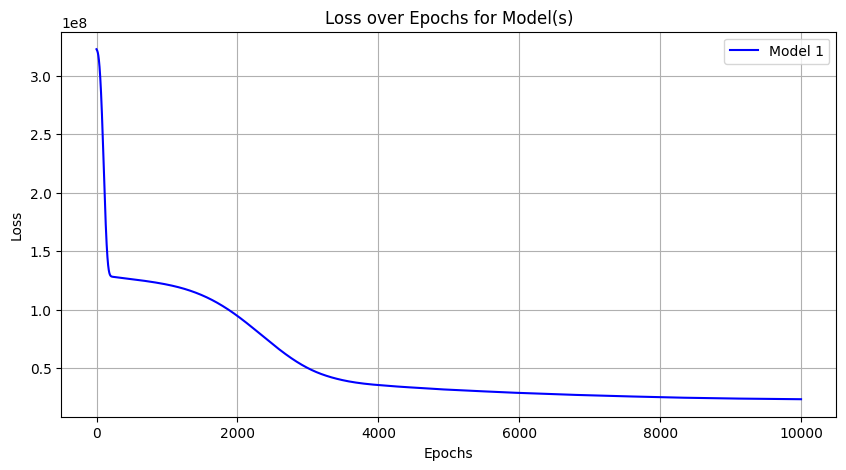



Two Layer
Epoch [1000/10000], Loss: 27484528.0000
Epoch [2000/10000], Loss: 21941408.0000
Epoch [3000/10000], Loss: 20705788.0000
Epoch [4000/10000], Loss: 19497722.0000
Epoch [5000/10000], Loss: 18684304.0000
Epoch [6000/10000], Loss: 18140126.0000
Epoch [7000/10000], Loss: 17499470.0000
Epoch [8000/10000], Loss: 17036288.0000
Epoch [9000/10000], Loss: 16768193.0000
Epoch [10000/10000], Loss: 16411610.0000


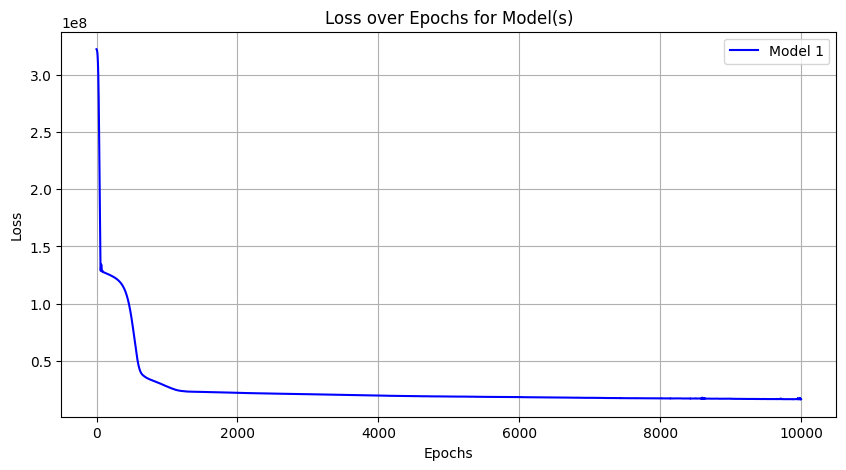



Three Layer
Epoch [1000/10000], Loss: 21164420.0000
Epoch [2000/10000], Loss: 18333172.0000
Epoch [3000/10000], Loss: 16563175.0000
Epoch [4000/10000], Loss: 15992789.0000
Epoch [5000/10000], Loss: 15119259.0000
Epoch [6000/10000], Loss: 14496861.0000
Epoch [7000/10000], Loss: 14531635.0000
Epoch [8000/10000], Loss: 12743263.0000
Epoch [9000/10000], Loss: 12270893.0000
Epoch [10000/10000], Loss: 16608746.0000


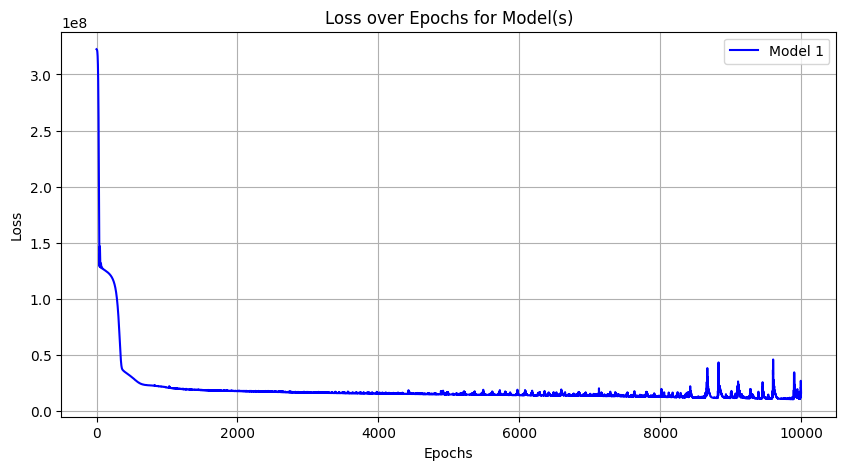



TwoLayerNN_LeakyReLU
Epoch [1000/10000], Loss: 30253744.0000
Epoch [2000/10000], Loss: 22870066.0000
Epoch [3000/10000], Loss: 20835786.0000
Epoch [4000/10000], Loss: 19956246.0000
Epoch [5000/10000], Loss: 19283520.0000
Epoch [6000/10000], Loss: 18967308.0000
Epoch [7000/10000], Loss: 18697286.0000
Epoch [8000/10000], Loss: 18407598.0000
Epoch [9000/10000], Loss: 18079324.0000
Epoch [10000/10000], Loss: 17362070.0000


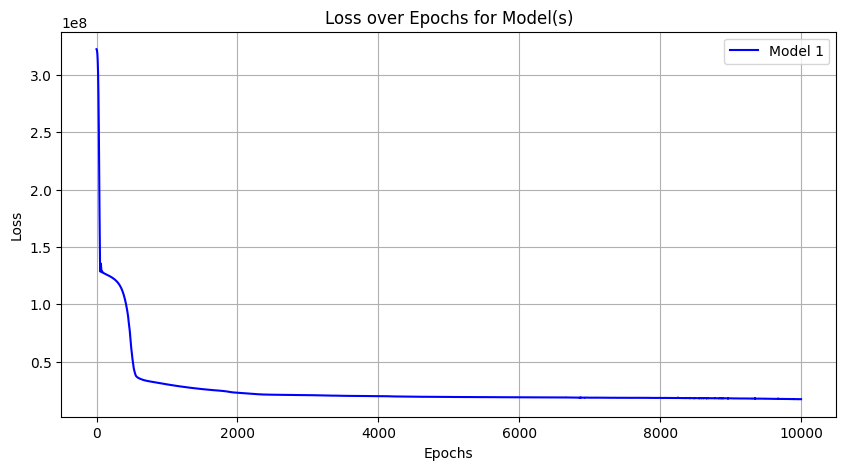

In [15]:
print('One Layer')
train(OneLayerNN(),'OneLayer')
print('\n')
print('Two Layer')
train(TwoLayerNN(),'TwoLayer')
print('\n')
print('Three Layer')
train(ThreeLayerNN(),'ThreeLayer')
print('\n')
print('TwoLayerNN_LeakyReLU')
train(TwoLayerNN_LeakyReLU(),'TwoLayer_LeakyReLU')